In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats


# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)




In [2]:
df = pd.read_csv("C:/Users/sreea/OneDrive/Desktop/breast-cancer-wisconsin/data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,...,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,...,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,...,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,...,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,...,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
df.drop("Unnamed: 32", axis=1, inplace=True)

In [6]:
df.shape

(569, 32)

In [7]:

# Review data types with "info()".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#check for missing variables
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:

df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,...,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,...,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,...,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,...,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,...,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,...,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,...,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [12]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

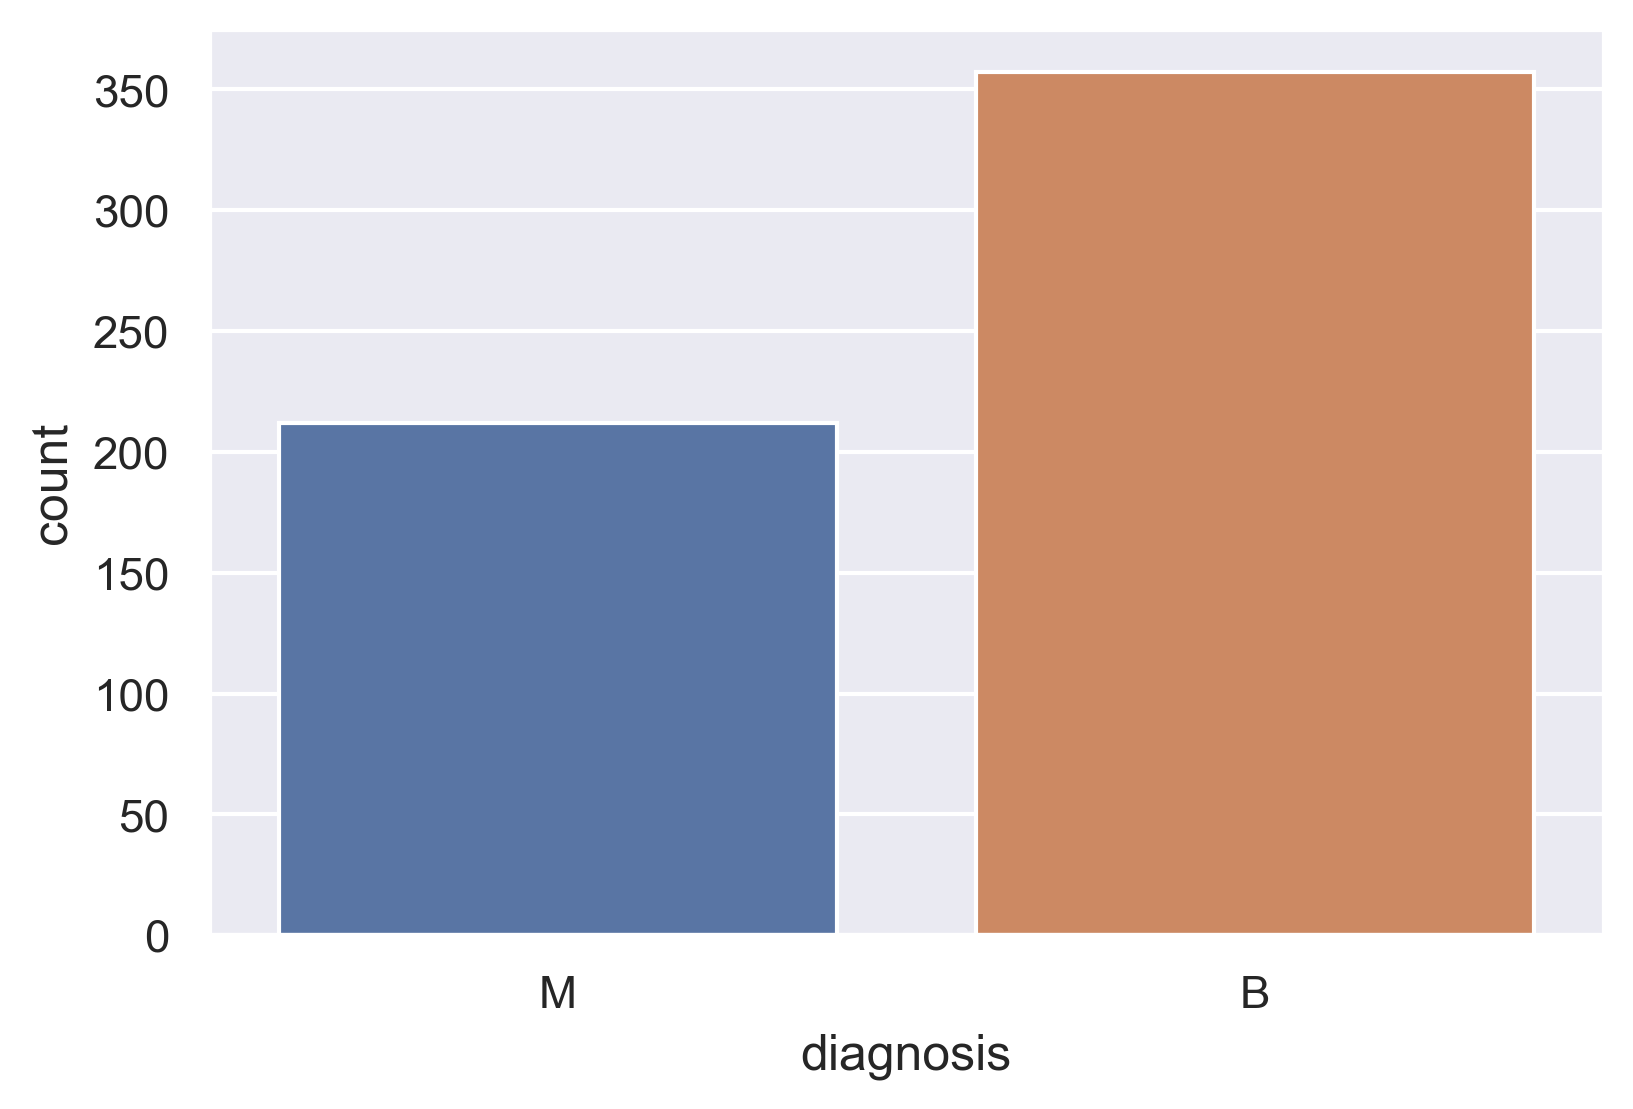

In [13]:
sns.countplot(x = "diagnosis", data = df)

In [14]:

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
df_mean=df.iloc[:,2:12]

df_se = df.iloc[:,12:22]

df_worst = df.iloc[:,22:]

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

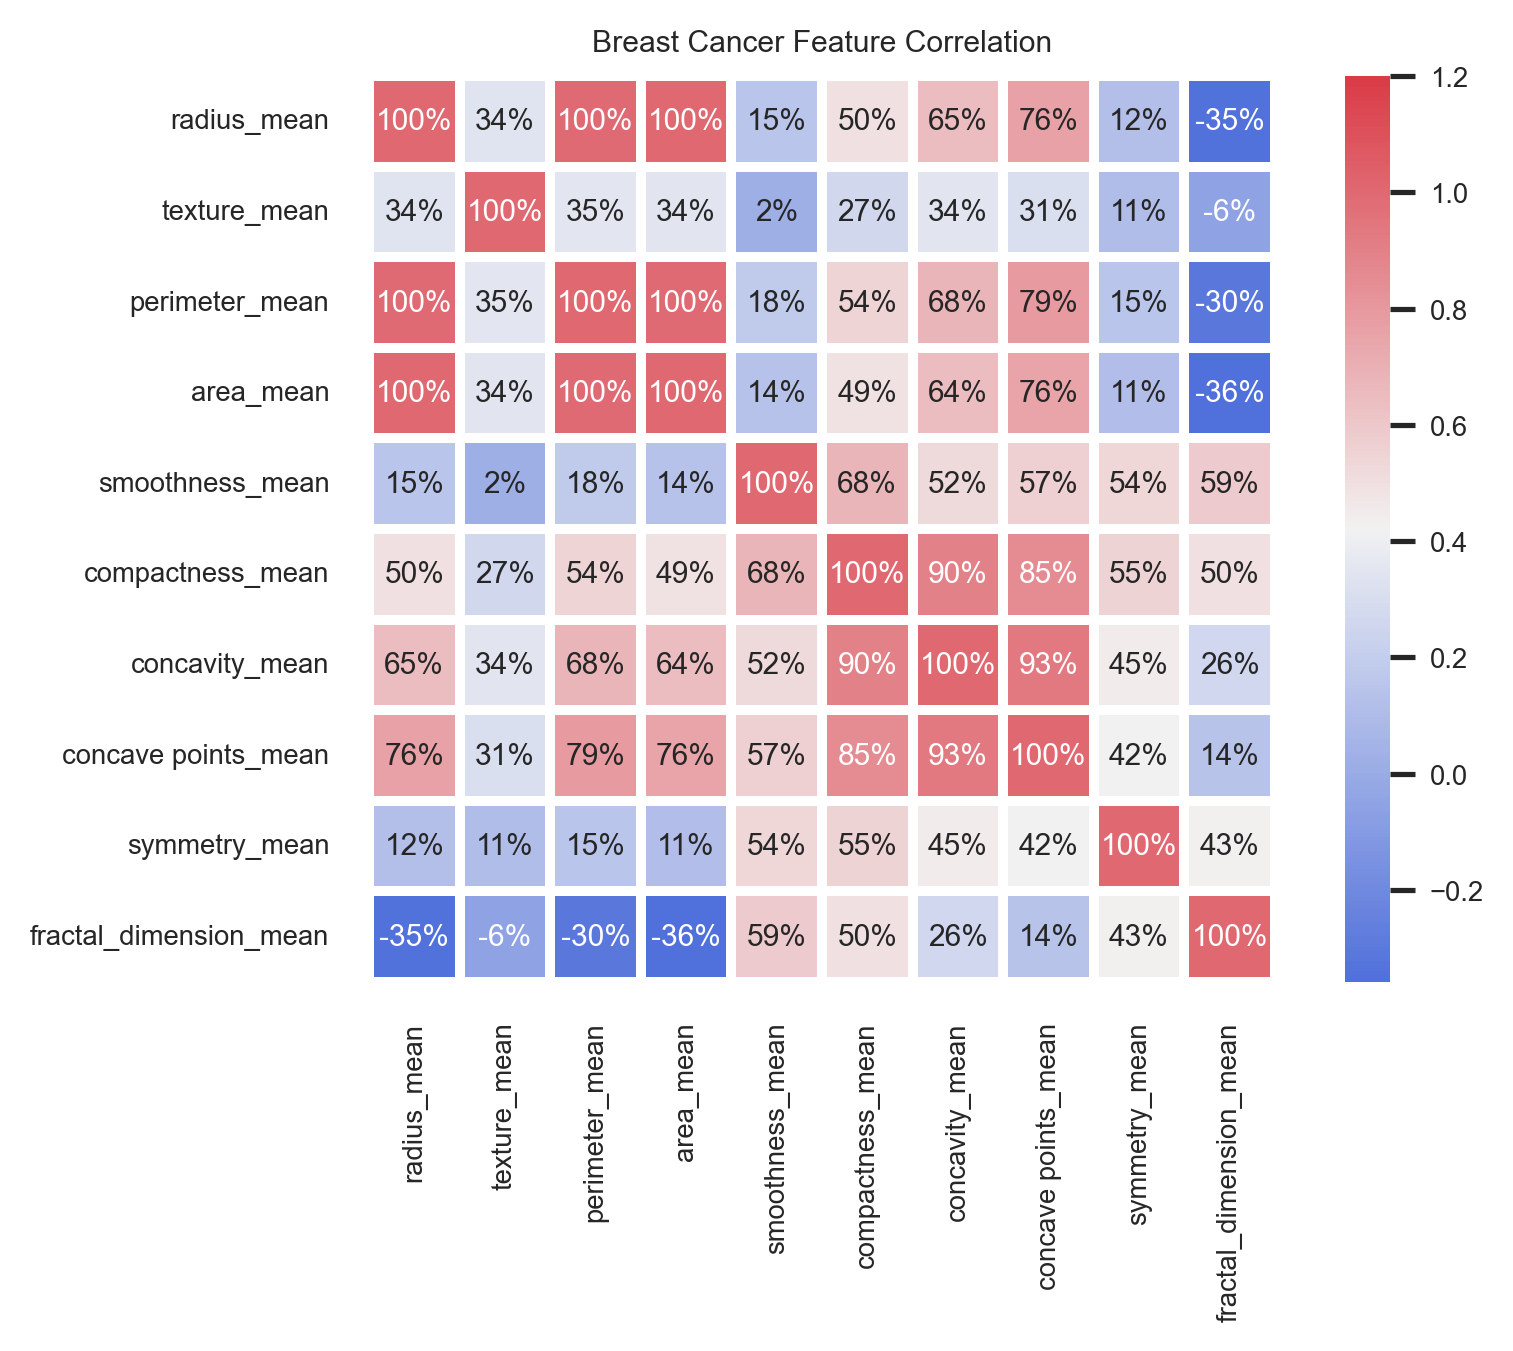

In [16]:
sns.set(font_scale=0.6)
plt.title('Breast Cancer Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df_mean.corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)


In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features_mean = correlation(df_mean, 0.85)
corr_features_se = correlation(df_se, 0.85)
corr_features_worst = correlation(df_worst, 0.85)

display(corr_features_mean, corr_features_se, corr_features_worst)

{'area_mean', 'concave points_mean', 'concavity_mean', 'perimeter_mean'}

{'area_se', 'concavity_se', 'perimeter_se'}

{'area_worst', 'concave points_worst', 'concavity_worst', 'perimeter_worst'}

In [19]:


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["diagnosis"] = encoder.fit_transform(df['diagnosis'])

In [20]:



df_anova = df.iloc[:,1:]
grps = pd.unique(df_anova.diagnosis.values)

coldrop = []

for i in range(1, len(df_anova.columns)):
    
    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.diagnosis == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and diagnosis".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and diagnosis \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and diagnosis \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

print(coldrop)

P_Value of radius_mean and diagnosis 8.465940572263339e-96
There is relation between radius_mean and diagnosis 

P_Value of texture_mean and diagnosis 4.0586360478986136e-25
There is relation between texture_mean and diagnosis 

P_Value of perimeter_mean and diagnosis 8.43625103617395e-101
There is relation between perimeter_mean and diagnosis 

P_Value of area_mean and diagnosis 4.734564310307994e-88
There is relation between area_mean and diagnosis 

P_Value of smoothness_mean and diagnosis 1.051850359203376e-18
There is relation between smoothness_mean and diagnosis 

P_Value of compactness_mean and diagnosis 3.938263105887557e-56
There is relation between compactness_mean and diagnosis 

P_Value of concavity_mean and diagnosis 9.966555755074321e-84
There is relation between concavity_mean and diagnosis 

P_Value of concave points_mean and diagnosis 7.101150161059557e-116
There is relation between concave points_mean and diagnosis 

P_Value of symmetry_mean and diagnosis 5.733384028

In [21]:

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

var_thres.get_support()

print(df.columns[var_thres.get_support()])


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [22]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

[]
0


In [23]:
display(corr_features_mean, corr_features_se, corr_features_worst)
display(coldrop)

corr_features_mean = list(corr_features_mean)
corr_features_se = list(corr_features_se)
corr_features_worst = list(corr_features_worst)

list_drop = corr_features_mean + corr_features_se + corr_features_worst + coldrop
list_drop = list(set(list_drop))
list_drop.append("id")
list_drop


{'area_mean', 'concave points_mean', 'concavity_mean', 'perimeter_mean'}

{'area_se', 'concavity_se', 'perimeter_se'}

{'area_worst', 'concave points_worst', 'concavity_worst', 'perimeter_worst'}

['fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se']

['concavity_se',
 'concave points_worst',
 'perimeter_se',
 'area_mean',
 'area_worst',
 'fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'concavity_mean',
 'perimeter_worst',
 'symmetry_se',
 'fractal_dimension_se',
 'concave points_mean',
 'area_se',
 'perimeter_mean',
 'concavity_worst',
 'id']

In [24]:
df.drop(list_drop, axis=1, inplace=True)
display(df.columns)
display(df.shape)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'radius_se', 'compactness_se',
       'concave points_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

(569, 15)

In [25]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,compactness_se,concave points_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,1.0950,0.04904,0.01587,25.38,17.33,0.1622,0.6656,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.5435,0.01308,0.01340,24.99,23.41,0.1238,0.1866,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.7456,0.04006,0.02058,23.57,25.53,0.1444,0.4245,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.4956,0.07458,0.01867,14.91,26.50,0.2098,0.8663,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.7572,0.02461,0.01885,22.54,16.67,0.1374,0.2050,0.2364,0.07678


In [26]:

x = df.drop( "diagnosis", axis=1)
y = df.diagnosis


In [27]:

scaler = StandardScaler()
features = scaler.fit_transform(x)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=1)

y_train.shape, y_train[y_train==1].shape, y_train[y_train==0].shape


((398,), (149,), (249,))

In [33]:
pip install -U imbalanced-learn

     -------------------------------------- 199.3/199.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 3.8 MB/s eta 0:00:00



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [30]:


# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [31]:
os =  RandomOverSampler(sampling_strategy=1)

x_train, y_train = os.fit_resample(x_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(x_train))

249 249
498


In [32]:
def lr_grid_search(X, y):
    model = LogisticRegression()
    
    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    return grid_result.best_params_

lr_grid_search(x_train, y_train)

lr =LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9532163742690059
Precision: 0.9365079365079365
Recall: 0.9365079365079365
0.9859437751004017
0.9532163742690059


In [33]:
lr_tacc = lr.score(x_test,y_test)
lr_train_acc = lr.score(x_train, y_train)

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

<AxesSubplot:>

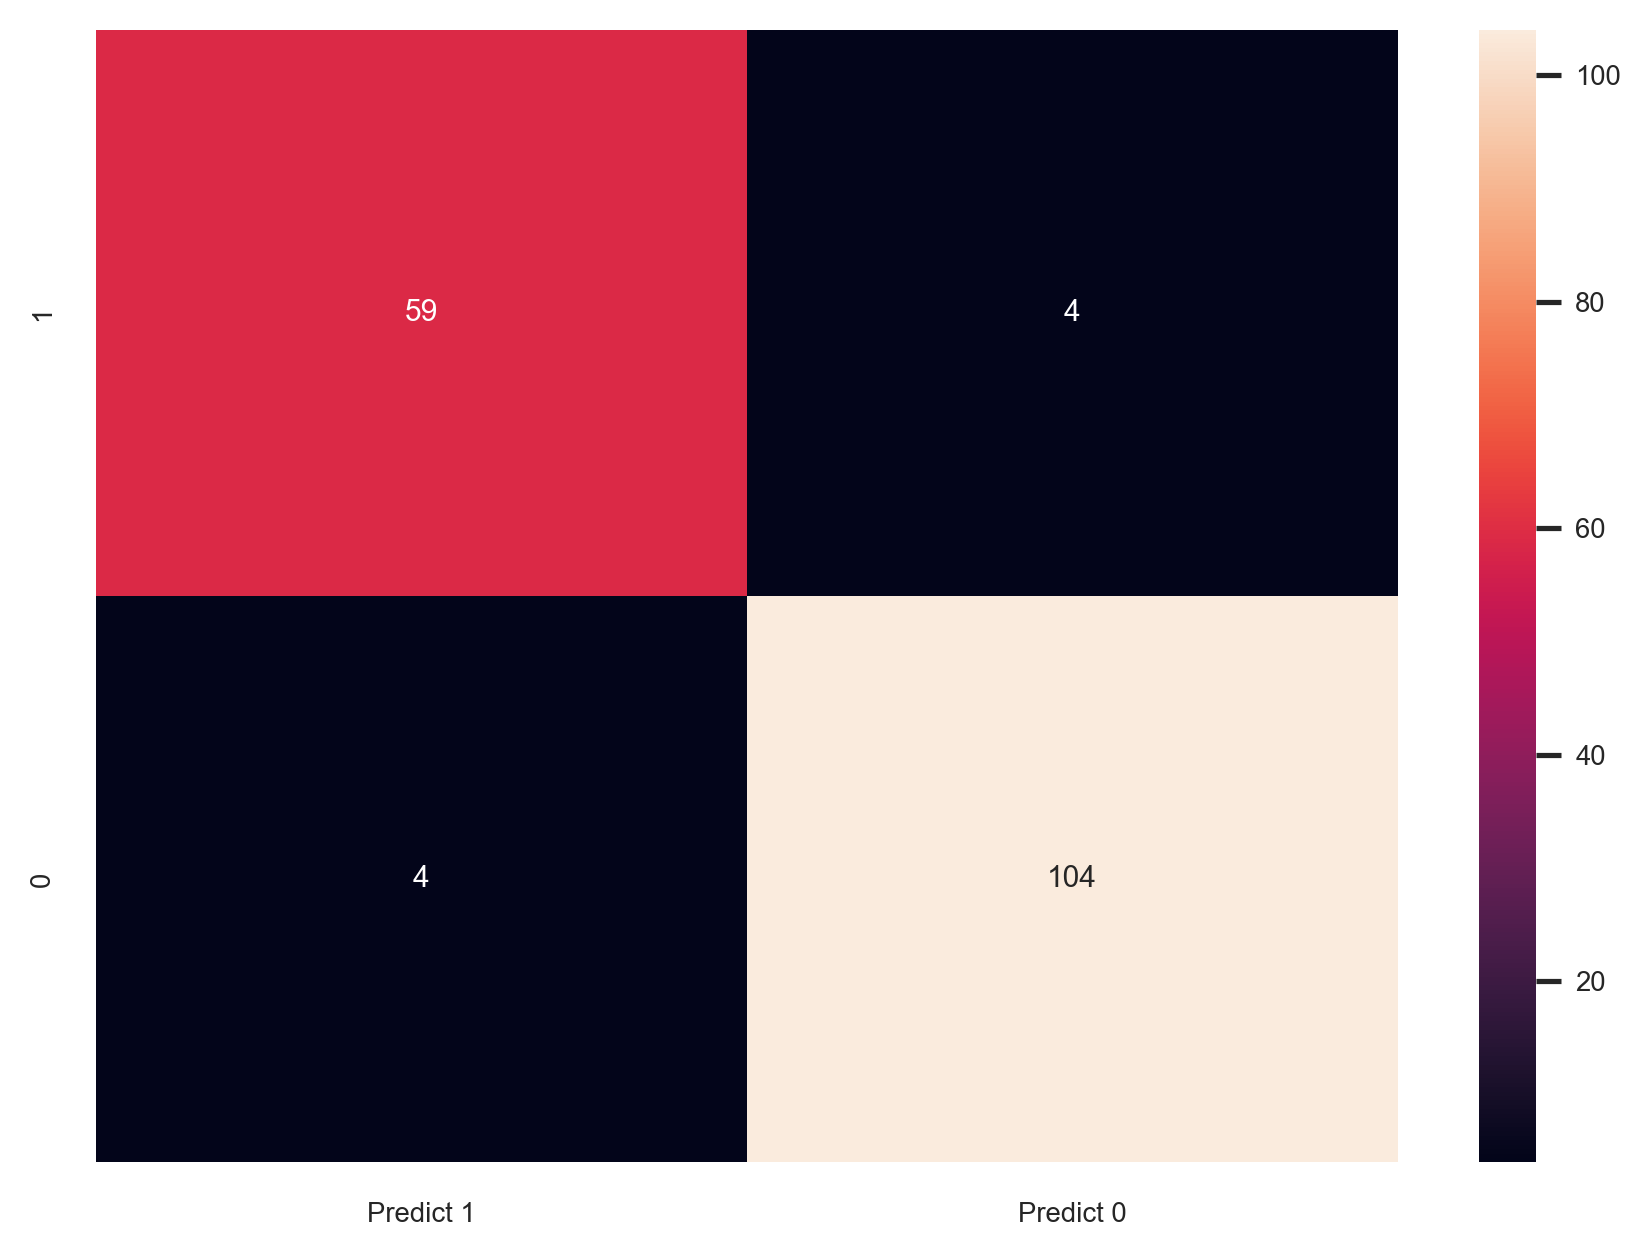

In [35]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [36]:

y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

array([0.        , 0.01587302, 0.93650794, 0.93650794, 0.96825397,
       0.96825397, 0.98412698, 0.98412698, 1.        , 1.        ])

In [37]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.9941211052322163

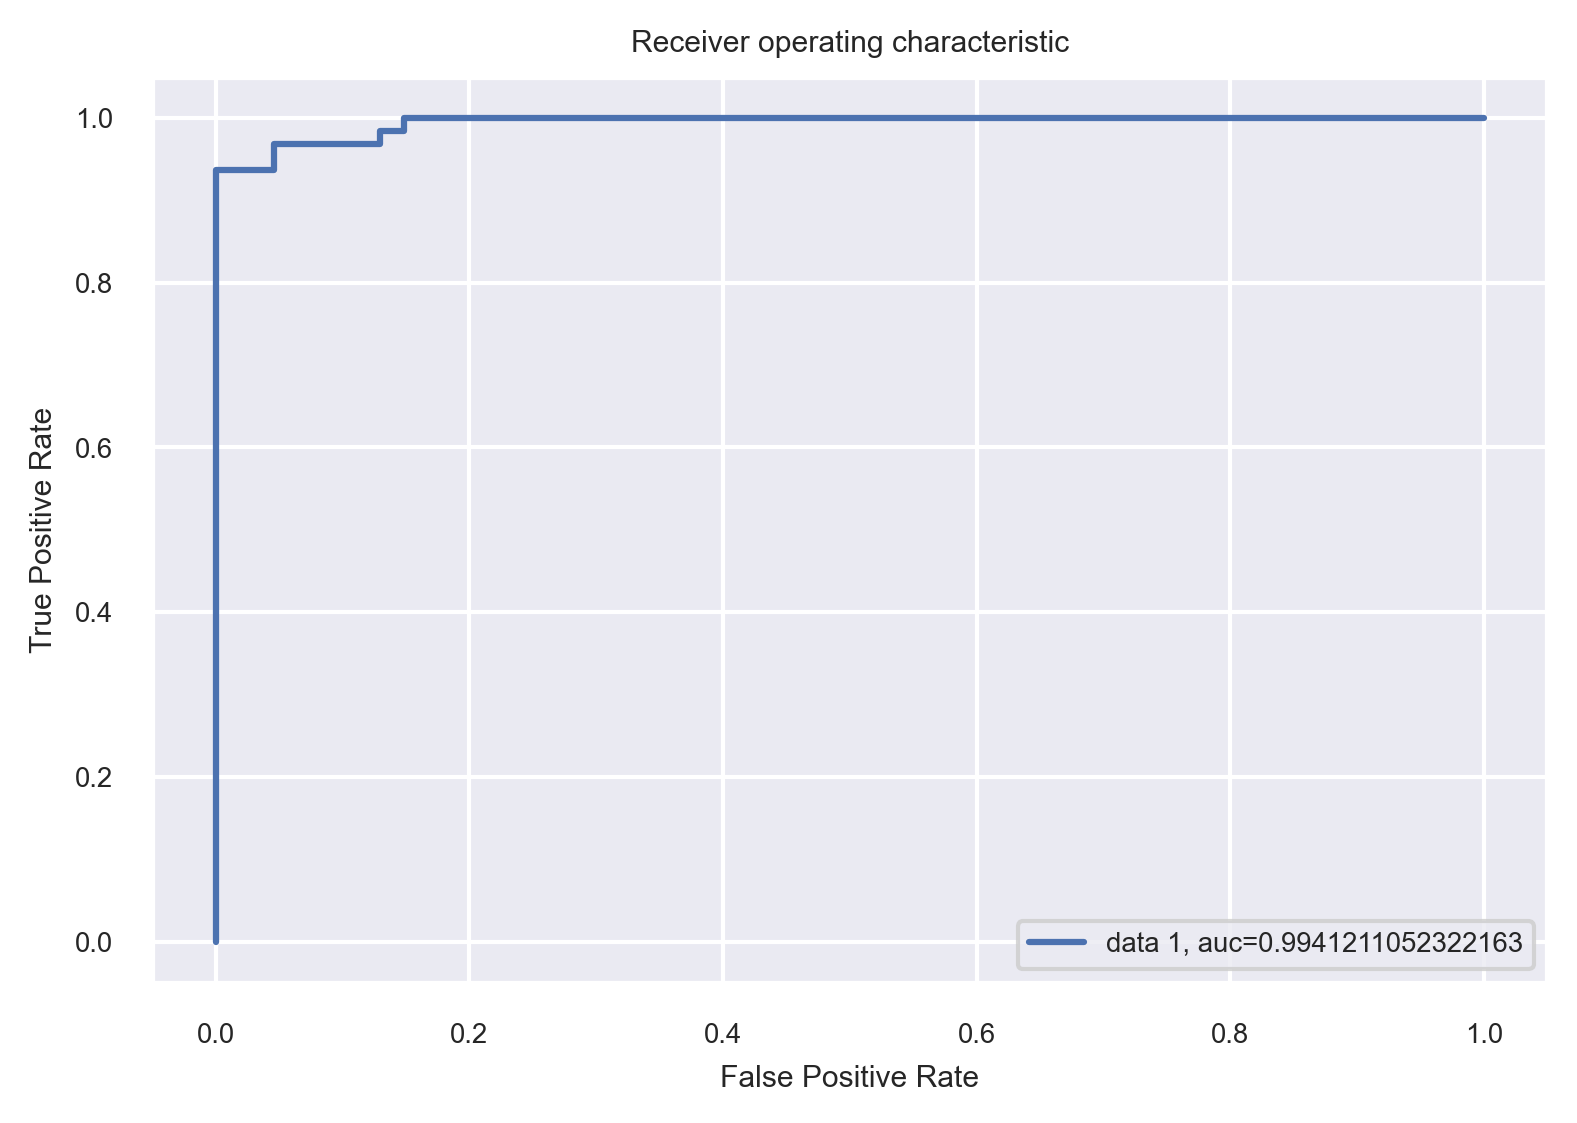

In [38]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


In [39]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.9941211052322163

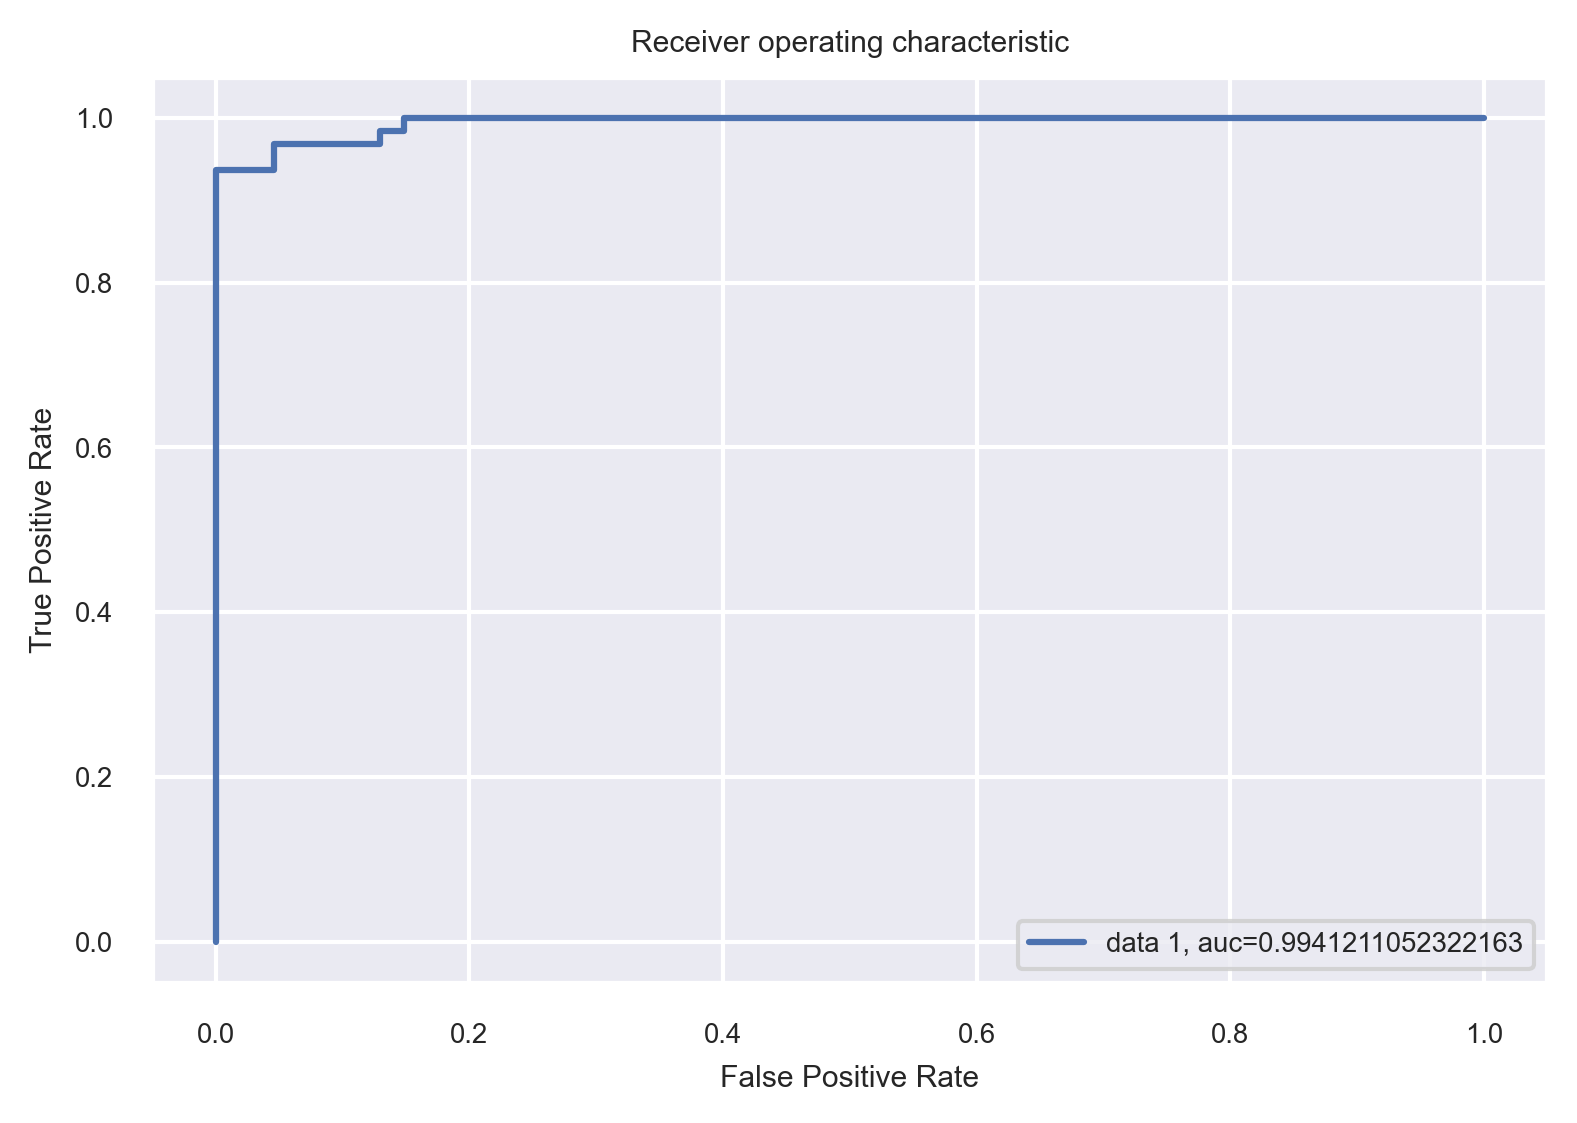

In [40]:

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


In [41]:
lr_auc = auc
lr_auc

0.9941211052322163